## Predicting Stroke Risk Based on Lifestyle Habits - Exploratory Data Analysis

#### Interesting questions to explore:
1) How does BMI change with age?
2) How does smoking affect sleep?
3) What age groups smoke the most?
4) How does exercise affect sleep?
5) What is the relationship between smoking and BMI?
6) How does exercise frequency affect BMI?
7) How is exercise frequency related to age?
8) How is exercise frequency related to stroke risk?
9) How is age related to stroke risk?
10) How is BMI related to stroke risk?
11) How is sleep duration related to stroke risk?
12) How is smoking related to stroke risk?
13) Are any of the dataset features correlated?

#### Import Libraries

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Exploratory Data Analysis (EDA)

#### Statistical measures

In [55]:
stroke_data = pd.read_csv("/content/I05-0006 stroke_risk.csv")
stroke_data.head()

,age,bmi,sleep_hours,smoking_status,exercise_frequency,stroke_risk
0,44,29.4,6.0,Former,High,No
1,76,29.3,10.1,Never,Low,No
2,43,23.6,3.4,Never,Low,Yes
3,59,33.5,5.7,Current,Moderate,No
4,77,26.0,6.1,Never,Low,No


In [56]:
stroke_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 500 non-null    int64  
 1   bmi                 500 non-null    float64
 2   sleep_hours         500 non-null    float64
 3   smoking_status      500 non-null    object 
 4   exercise_frequency  500 non-null    object 
 5   stroke_risk         500 non-null    object 
dtypes: float64(2), int64(1), object(3)
memory usage: 23.6+ KB


In [57]:
stroke_data.describe()

,age,bmi,sleep_hours
count,500.000000,500.000000,500.000000
mean,55.426000,27.043600,7.039800
std,14.665151,4.918378,1.508797
min,30.000000,12.900000,2.700000
25%,42.000000,23.600000,6.000000
50%,57.000000,26.800000,7.000000
75%,68.000000,30.225000,8.100000
max,79.000000,43.900000,11.900000


In [58]:
stroke_data.isnull().sum()

,0
age,0
bmi,0
sleep_hours,0
smoking_status,0
exercise_frequency,0
stroke_risk,0


In [59]:
# Creating a column for age groups
bins = [30, 40, 50, 60, 70, 80]
labels = ["30–39", "40–49", "50–59", "60–69", "70–79"]
stroke_data["age_groups"] = pd.cut(stroke_data["age"], bins=bins, labels=labels, right=False)
stroke_data.head()

,age,bmi,sleep_hours,smoking_status,exercise_frequency,stroke_risk,age_groups
0,44,29.4,6.0,Former,High,No,40–49
1,76,29.3,10.1,Never,Low,No,70–79
2,43,23.6,3.4,Never,Low,Yes,40–49
3,59,33.5,5.7,Current,Moderate,No,50–59
4,77,26.0,6.1,Never,Low,No,70–79


#### Class Distributions of Categorical Variables

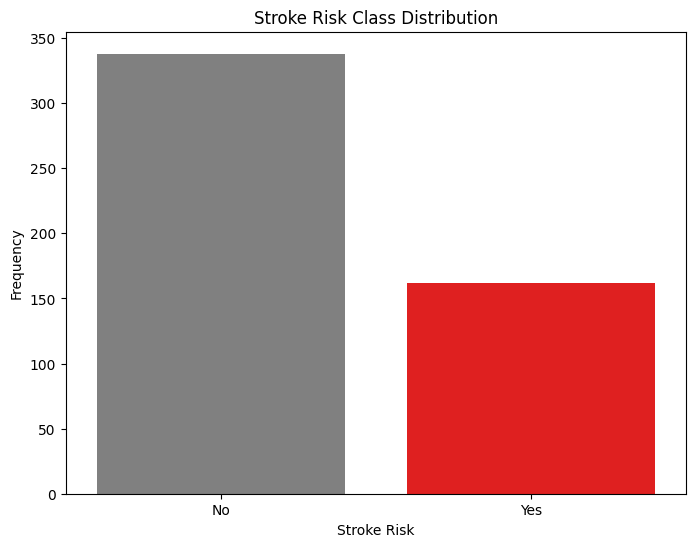

In [60]:
# Class distribution of target variable
plt.rcParams['figure.figsize'] = (8, 6)
sns.countplot(x='stroke_risk', data=stroke_data, hue="stroke_risk", palette=["gray","red"])
plt.title("Stroke Risk Class Distribution")
plt.xlabel("Stroke Risk")
plt.ylabel("Frequency")
plt.show()

Considerable class imbalance, has to be addressed

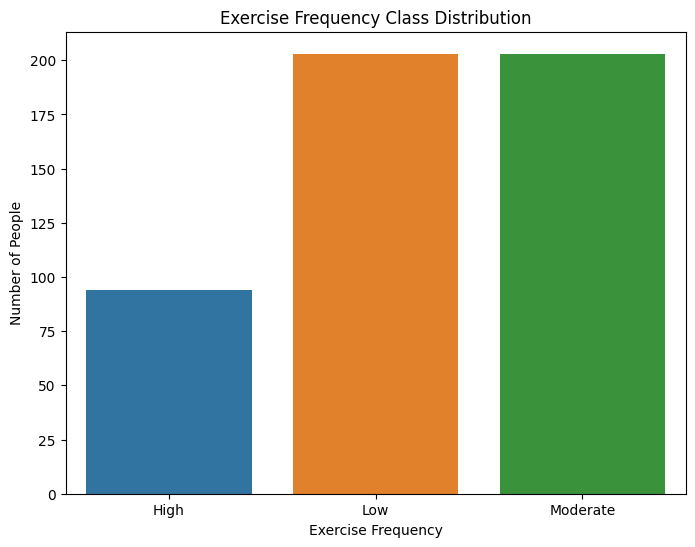

In [61]:
# Class distribution of exercise frequency
sns.countplot(x="exercise_frequency", data=stroke_data, hue="exercise_frequency")
plt.title("Exercise Frequency Class Distribution")
plt.xlabel("Exercise Frequency")
plt.ylabel("Number of People")
plt.show()

Most subjects exercise rarely or moderately, which is not surprising

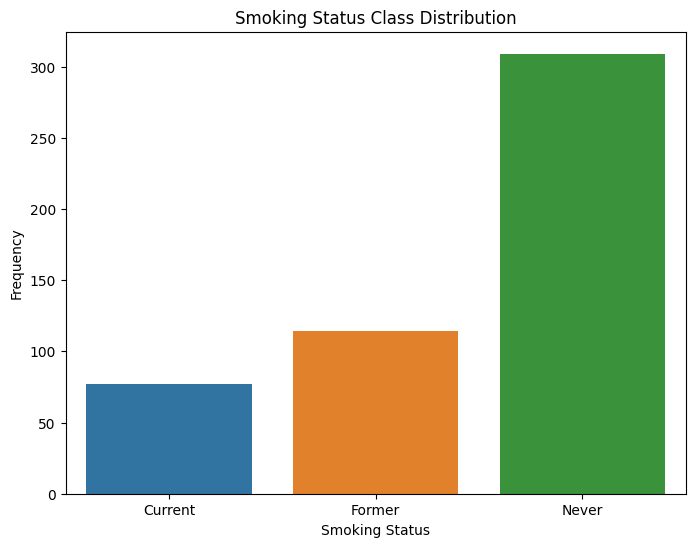

In [62]:
# Class distribution of smoking status
order = ["Current", "Former", "Never"]
sns.countplot(x="smoking_status", data=stroke_data, hue="smoking_status",
              order=order, hue_order=order)
plt.title("Smoking Status Class Distribution")
plt.xlabel("Smoking Status")
plt.ylabel("Frequency")
plt.show()

Most subjects have never smoked, also not surprising

#### How does BMI change with age?

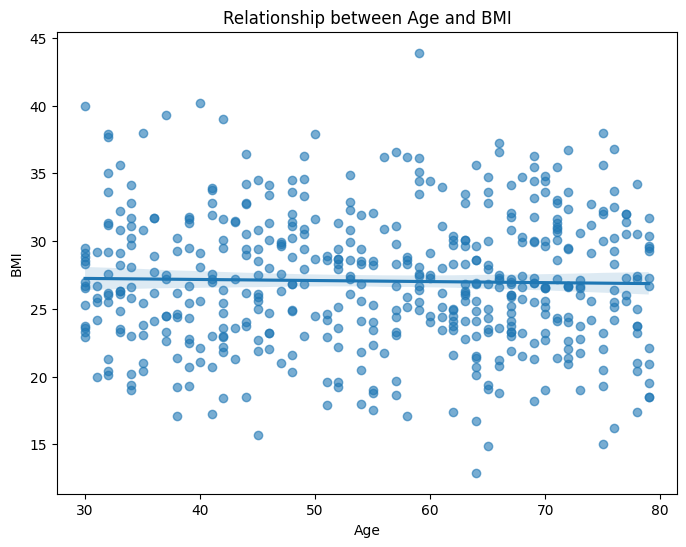

In [63]:
# Scatterplot of BMI and age
sns.regplot(x="age", y="bmi", data=stroke_data, scatter_kws={'alpha':0.6})
plt.title("Relationship between Age and BMI")
plt.xlabel("Age")
plt.ylabel("BMI")
plt.show()

No clear trend, clarify with another visualization

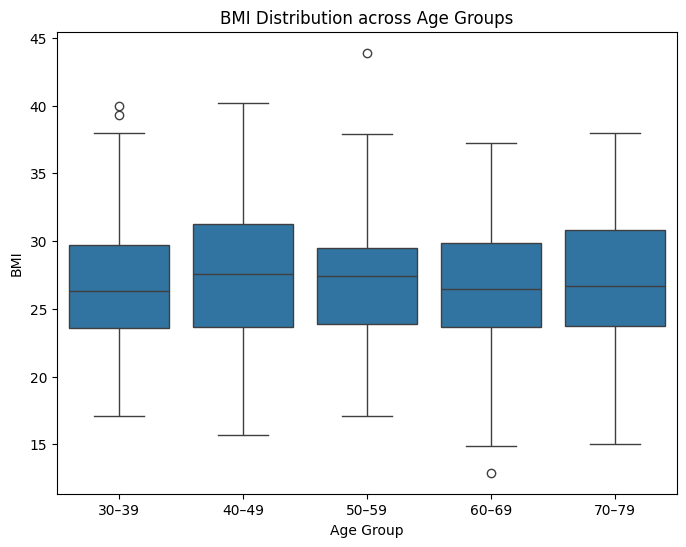

In [64]:
# Box plot showing BMI distribution across age groups
sns.boxplot(x="age_groups", y="bmi", data=stroke_data)
plt.title("BMI Distribution across Age Groups")
plt.xlabel("Age Group")
plt.ylabel("BMI")
plt.show()

Increase in BMI in 40's followed by decrease in 60's. May signal decrease in body metabolism and loss of muscle mass respectively

#### How does smoking affect sleep?

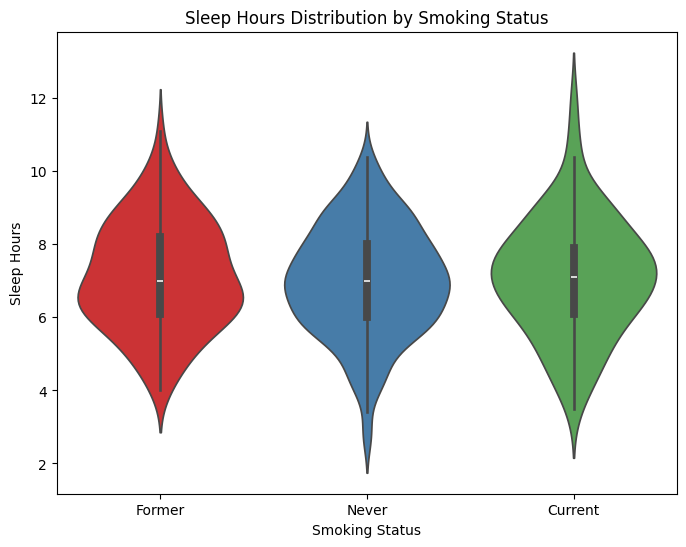

In [65]:
# Violin plot of sleep hour distribution by smoking status
sns.violinplot(x="smoking_status", y="sleep_hours", data=stroke_data, inner='box', hue="smoking_status", palette='Set1')
plt.title("Sleep Hours Distribution by Smoking Status")
plt.xlabel("Smoking Status")
plt.ylabel("Sleep Hours")
plt.show()

Smoking has been linked to sleep disturbances, not very clear from this visualization

#### What age groups smoke the most?

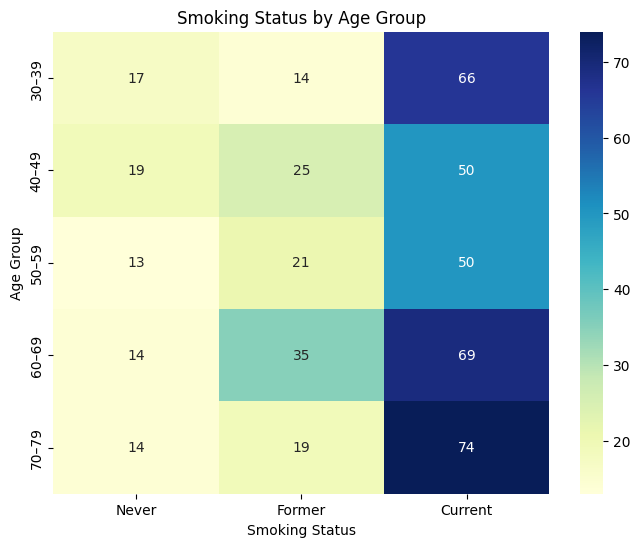

In [66]:
# Heatmap showing smoking status distribution across age groups
counts = pd.crosstab(stroke_data["age_groups"], stroke_data["smoking_status"])
ax = sns.heatmap(counts, annot=True, fmt='d', cmap='YlGnBu')
ax.set_xticklabels(['Never', 'Former', 'Current'])
ax.set_ylabel('Age Group')
ax.set_xlabel('Smoking Status')
plt.title('Smoking Status by Age Group')
plt.show()

Older subjects (70-79) smoke more? Quite surprising. I expected the younger age classes to have significantly more smokers

#### How does exercise affect sleep?

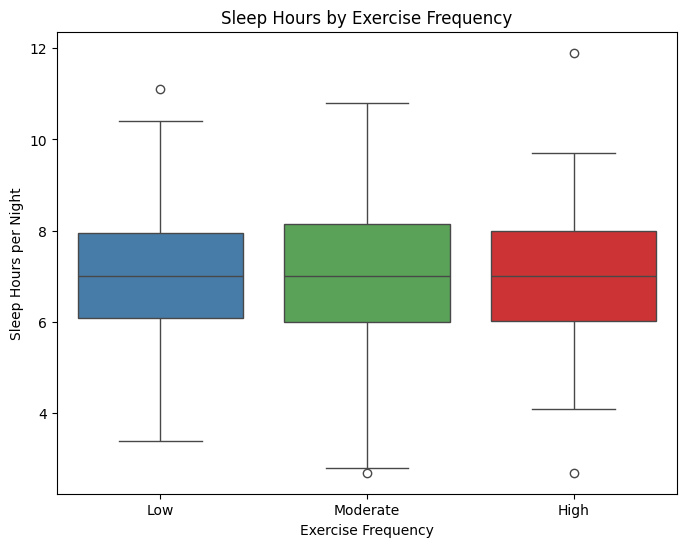

In [67]:
# Box plot showing the relationship between sleep hours and exercise frequency
sns.boxplot(x="exercise_frequency", y="sleep_hours", data=stroke_data, order=["Low","Moderate","High"], hue="exercise_frequency", palette="Set1")
plt.title("Sleep Hours by Exercise Frequency")
plt.xlabel("Exercise Frequency")
plt.ylabel("Sleep Hours per Night")
plt.show()

Exercise has been linked to better and longer sleep, not very obvious from this visualization

#### What is the relationship between smoking and BMI?

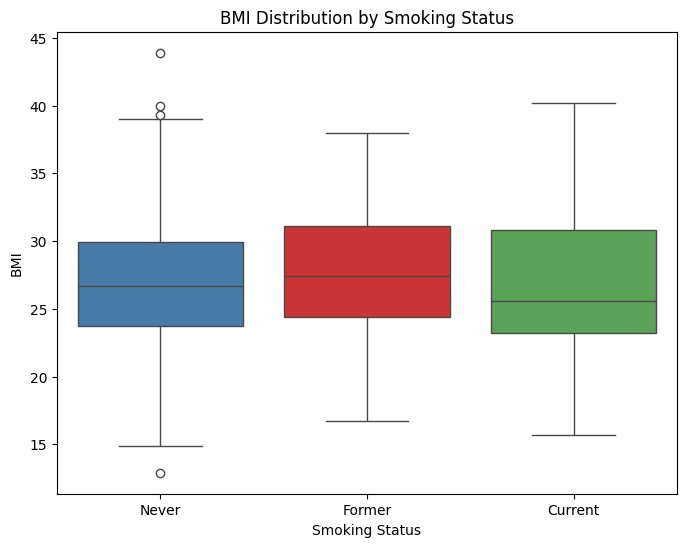

In [68]:
# Box plot showing the relationship between smoking status and BMI
sns.boxplot(x="smoking_status", y="bmi", data=stroke_data, order=["Never", "Former", "Current"], hue="smoking_status", palette="Set1")
plt.title("BMI Distribution by Smoking Status")
plt.xlabel("Smoking Status")
plt.ylabel("BMI")
plt.show()

Smoking reduces appetite and could therefore decrease BMI. Lower BMI here might point to that

#### How does exercise frequency affect BMI?

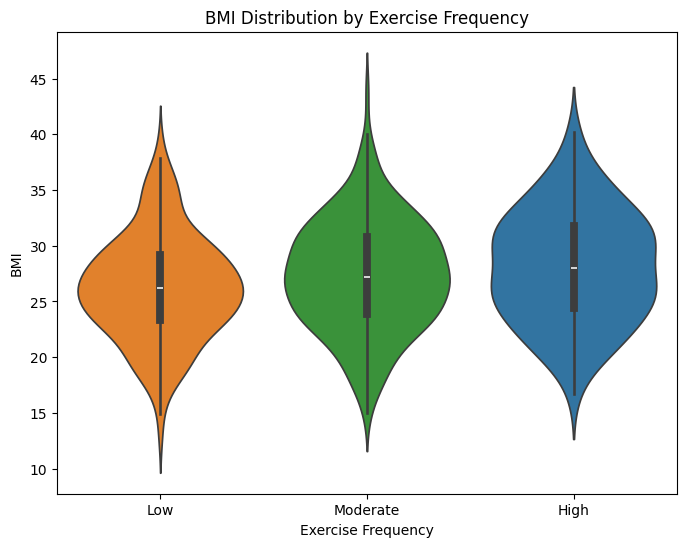

In [69]:
# Violin plot showing the relationship between exercise frequency and BMI
sns.violinplot(x="exercise_frequency", y="bmi", data=stroke_data, inner='box',
               hue="exercise_frequency", order=["Low", "Moderate", "High"])
plt.title("BMI Distribution by Exercise Frequency")
plt.xlabel("Exercise Frequency")
plt.ylabel("BMI")
plt.show()

Exercise should intuitively decrease BMI, no clear trend here

#### How much do the different age groups exercise?

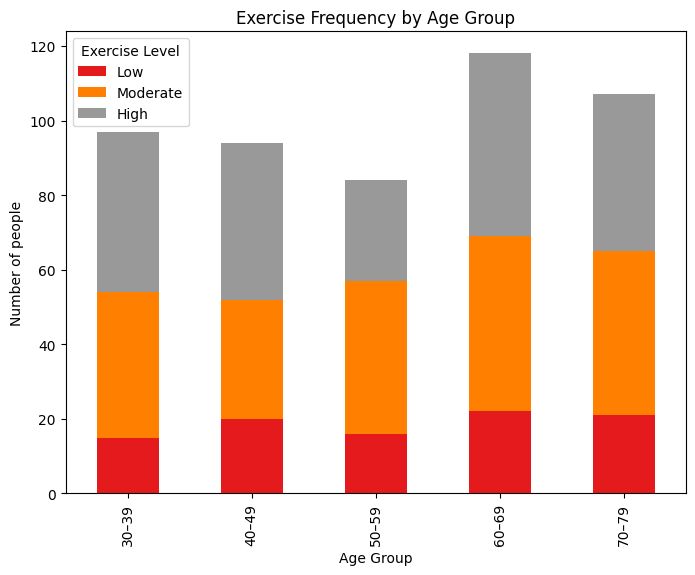

In [70]:
# Stacked bar plot showing the distribution of exercise levels across age groups
counts = pd.crosstab(stroke_data["age_groups"], stroke_data["exercise_frequency"])
ax = counts.plot(kind="bar", stacked=True, figsize=(8,6), colormap="Set1")
plt.ylabel("Number of people")
plt.xlabel("Age Group")
plt.title("Exercise Frequency by Age Group")
ax.legend(labels=["Low", "Moderate", "High"], title="Exercise Level")
plt.show()

Most frequent exercisers are in the 60-69 age group. Interesting and expected, because people inherently become more health consious at this age and have more free time

#### How is exercise frequency related to stroke risk

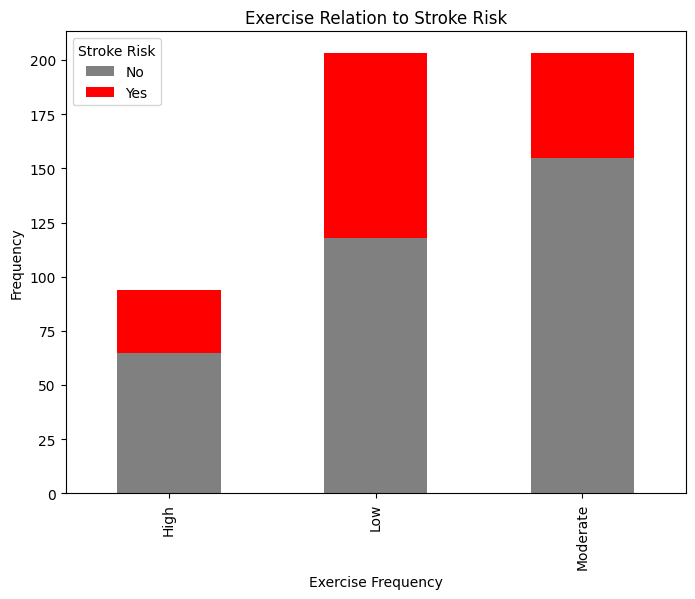

In [83]:
# Stacked bar plot showing the distribution of exercise frequency for each stroke risk class
counts = pd.crosstab(stroke_data["exercise_frequency"], stroke_data["stroke_risk"])
colors = ["grey", "red"]
counts.plot(kind="bar", stacked=True, figsize=(8,6), color=colors)
plt.legend(title="Stroke Risk")
plt.ylabel("Frequency")
plt.xlabel("Exercise Frequency")
plt.title("Exercise Relation to Stroke Risk")
plt.show()

High frequency exercisers have a lower risk of stroke, no surprise there

#### How is age related to stroke risk?

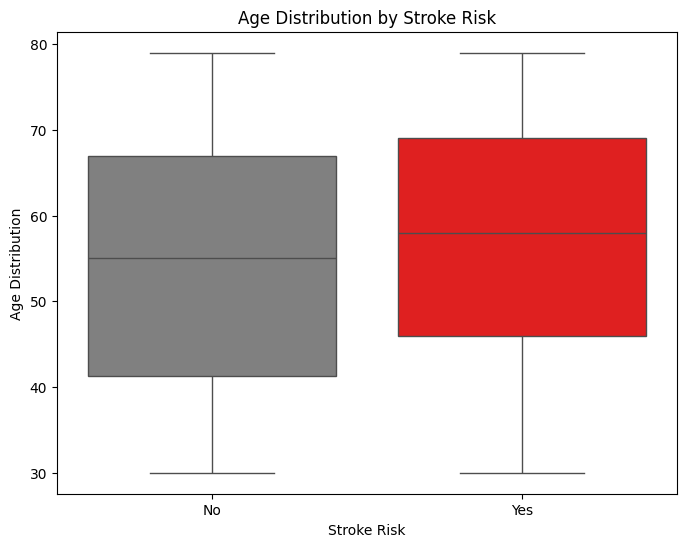

In [72]:
# Box plot showing the distribution of stroke risk with age
colors = ["grey", "red"]
sns.boxplot(x="stroke_risk", y="age", data=stroke_data, hue="stroke_risk", palette=colors)
plt.title("Age Distribution by Stroke Risk")
plt.xlabel("Stroke Risk")
plt.ylabel("Age Distribution")
plt.show()

Older subjects are at a higher risk of stroke, also not surprising from a medical perspective

#### What Age Group is at the Highest Risk for Stroke?

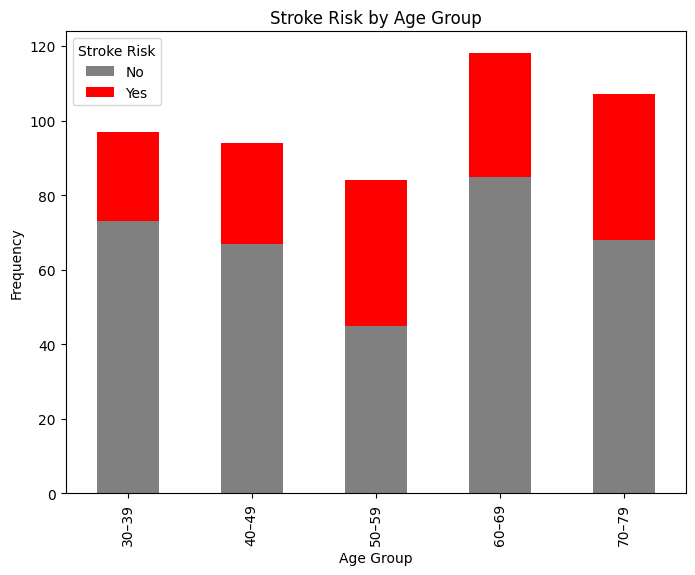

In [82]:
# Stacked bar plot showing the frequency of each stroke risk class across age groups
counts = pd.crosstab(stroke_data["age_groups"], stroke_data["stroke_risk"])
counts.plot(kind="bar", stacked=True, figsize=(8,6), color=colors)
plt.legend(title="Stroke Risk")
plt.ylabel("Frequency")
plt.xlabel("Age Group")
plt.title("Stroke Risk by Age Group")
plt.show()

The risk for stroke increases significantly from age 50

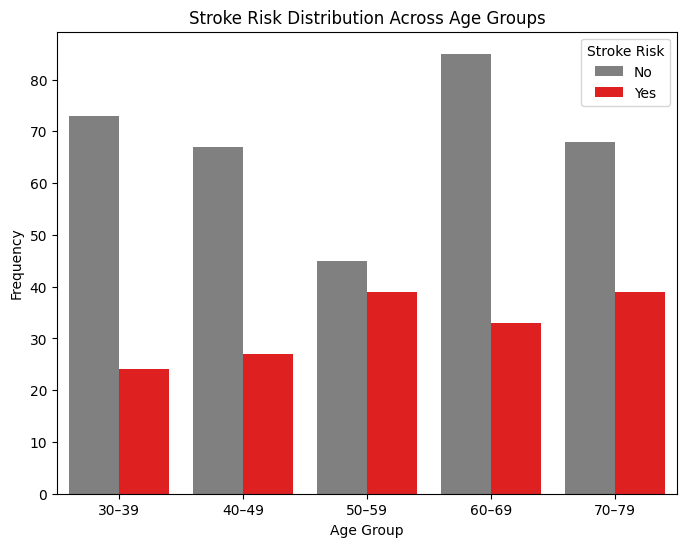

In [81]:
# Compound bar plot showing the frequency of each stroke risk class across age groups
age_stroke_counts = stroke_data.groupby(["age_groups", "stroke_risk"], observed=True).size().reset_index(name="count")
palette = {"No": "grey", "Yes": "red"}
plt.figure(figsize=(8,6))
sns.barplot(data=age_stroke_counts, x="age_groups", y="count", hue="stroke_risk", palette=palette)
plt.title("Stroke Risk Distribution Across Age Groups")
plt.xlabel("Age Group")
plt.ylabel("Frequency")
plt.legend(title="Stroke Risk")
plt.show()


High risk classes are 50-59 and 70-79. Strange that the class 60-69 is lower. May be because of the high number of frequent exercisers in this age group

#### How is BMI related to stroke risk?

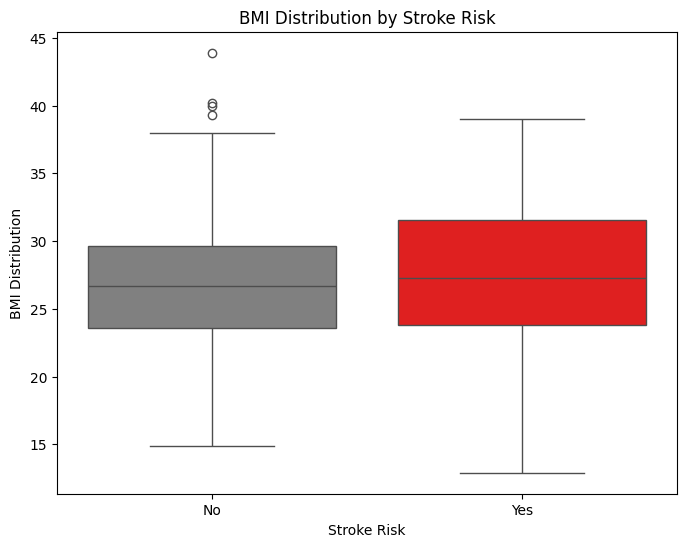

In [75]:
# Box plot showing the distribution of BMI across each stroke risk class
sns.boxplot(x="stroke_risk", y="bmi", data=stroke_data, hue="stroke_risk", palette=colors)
plt.title("BMI Distribution by Stroke Risk")
plt.xlabel("Stroke Risk")
plt.ylabel("BMI Distribution")
plt.show()

Slightly higher BMI mean in the stroke prone class, this is expected because obesity is a risk factor for stroke

### How is sleep duration related to stroke risk?

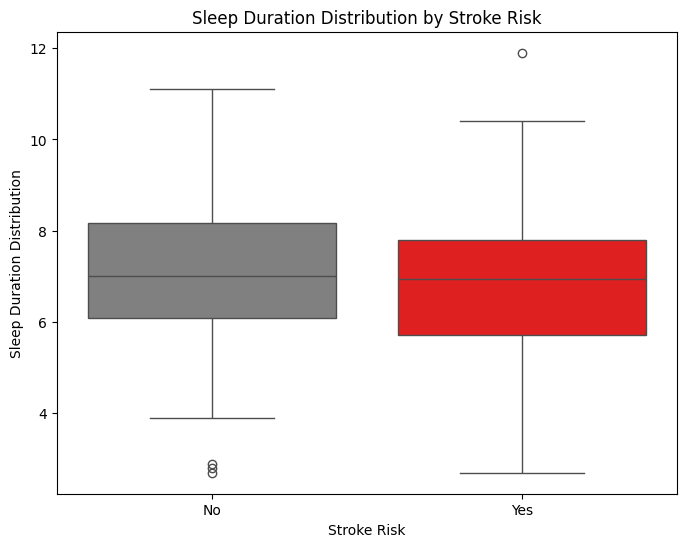

In [76]:
# Bar plot showing the distribution of sleep duration across the two stroke risk classes
sns.boxplot(x="stroke_risk", y="sleep_hours", data=stroke_data, hue="stroke_risk", palette=colors)
plt.title("Sleep Duration Distribution by Stroke Risk")
plt.xlabel("Stroke Risk")
plt.ylabel("Sleep Duration Distribution")
plt.show()

The relationship of sleep duration to stroke has been said to be U-shaped: both too short (< 6 hours) and too long (> 8 hours) sleep durations have been linked to stroke incidence

#### How is smoking related to the risk of stroke occurence?

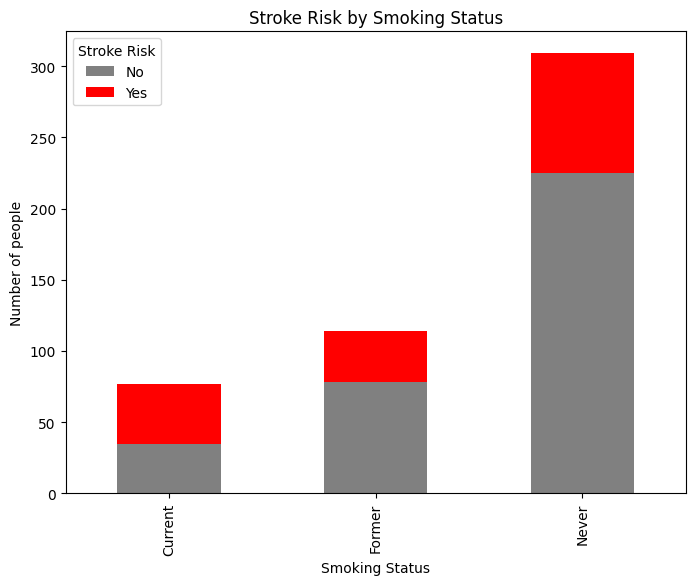

In [77]:
# Stacked bar plot showing the
counts = pd.crosstab(stroke_data["smoking_status"], stroke_data["stroke_risk"])
counts.plot(kind="bar", stacked=True, color=colors)
plt.legend(title="Stroke Risk", labels=["No", "Yes"])
plt.ylabel("Number of people")
plt.xlabel("Smoking Status")
plt.title("Stroke Risk by Smoking Status")
plt.show()

Most subjects in this dataset have never smoked, therefore the high number of stroke prone individuals in that class results from the high count of the class, and does not imply a relationship between being a non-smoker and stroke